In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width',1000)

In [2]:
colnames=['age','sex','cp','bps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','goal']

In [3]:
heart=pd.read_csv('heart.csv',header=None,names=colnames)

In [4]:
heart.head()

,age,sex,cp,bps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,goal
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0


In [5]:
heart.shape

(200, 14)

sex: sex (1 = male; 0 = female)
    
cp: chest pain type

-- Value 1: typical angina

-- Value 2: atypical angina

-- Value 3: non-anginal pain

-- Value 4: asymptomatic
    
    
bps: resting blood pressure (in mm Hg on admission to the hospital) 11 htn


chol: serum cholestoral in mg/dl
   
   
fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    
    
restecg: resting electrocardiographic results

-- Value 0: normal

-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
    
    
thalach: maximum heart rate achieved


exang: exercise induced angina (1 = yes; 0 = no)


oldpeak = ST depression induced by exercise relative to rest


slope: the slope of the peak exercise ST segment

-- Value 1: upsloping

-- Value 2: flat

-- Value 3: downsloping


ca: number of major vessels (0-3) colored by flourosopy


thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


goal: diagnosis of heart disease (angiographic disease status)

-- Value 0: < 50% diameter narrowing

-- Value 1: > 50% diameter narrowing

In [6]:
heart.shape

(200, 14)

In [7]:
heart.dtypes

age         int64
sex         int64
cp          int64
bps        object
chol       object
fbs        object
restecg     int64
thalach    object
exang      object
oldpeak    object
slope      object
ca         object
thal       object
goal        int64
dtype: object

In [8]:
# # majority dtypes are being shown as object, but actually contains int values
# bps,chol,fbs

# thalach,exang,oldpeak

# slope,ca,thal

In [9]:
# let's treat them individually

In [12]:
# heart['bps']

In [11]:
# first, replace ? with 0
heart['bps']=heart['bps'].str.replace('?','0')

In [15]:
# now, change the dtype to int
heart['bps']=heart['bps'].astype(np.int64)
heart['bps'].dtype

dtype('int64')

In [18]:
heart['chol']=heart['chol'].str.replace('?','0')
# heart['chol']

In [19]:
heart['chol']=heart['chol'].astype(np.int64)
heart['chol'].dtype

dtype('int64')

In [22]:
heart['fbs']=heart['fbs'].str.replace('?','5')
# heart['fbs']

In [23]:
heart['fbs']=heart['fbs'].astype(np.int64)
heart['fbs'].dtype

dtype('int64')

In [26]:
heart['thalach']=heart['thalach'].str.replace('?','0')
# heart['thalach']

In [27]:
heart['thalach']=heart['thalach'].astype(np.int64)
heart['thalach'].dtype

dtype('int64')

In [29]:
heart['exang']=heart['exang'].str.replace('?','5')
# heart['exang']

In [30]:
heart['exang']=heart['exang'].astype(np.int64)
heart['exang'].dtype

dtype('int64')

In [32]:
heart['oldpeak']=heart['oldpeak'].str.replace('?','5')
# heart['oldpeak']

In [34]:
heart['oldpeak']=heart['oldpeak'].astype(np.float64)
heart['oldpeak'].dtype

dtype('float64')

In [36]:
heart['slope']=heart['slope'].str.replace('?','5')
# heart['slope']

In [37]:
heart['slope']=heart['slope'].astype(np.int64)
heart['slope'].dtype

dtype('int64')

In [39]:
heart['ca']=heart['ca'].str.replace('?','5')
# heart['ca']

In [40]:
heart['ca']=heart['ca'].astype(np.int64)
heart['ca'].dtype

dtype('int64')

In [42]:
heart['thal']=heart['thal'].str.replace('?','5')
# heart['thal']

In [43]:
heart['thal']=heart['thal'].astype(np.int64)
heart['thal'].dtype

dtype('int64')

In [44]:
# missing values:
# thal,ca,slope,oldpeak,exang,fbs ---> 5 
# thalach,chol,bps ---> 0

In [45]:
heart.dtypes

age          int64
sex          int64
cp           int64
bps          int64
chol         int64
fbs          int64
restecg      int64
thalach      int64
exang        int64
oldpeak    float64
slope        int64
ca           int64
thal         int64
goal         int64
dtype: object

In [46]:
# we'll do missing value treatment first

In [47]:
heart.columns

Index(['age', 'sex', 'cp', 'bps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'goal'], dtype='object')

In [48]:
heart['age'].isnull().sum()

0

In [49]:
heart['sex'].isnull().sum()

0

In [50]:
heart['cp'].isnull().sum()

0

In [61]:
# heart['bps'].value_counts()
# # # 57 missing values

In [58]:
# check for outliers
# heart['bps'].plot.box()

In [55]:
# no outliers
heart['bps'].mean(),heart['bps'].median()

(96.31, 123.0)

In [57]:
# replace 0 with 96.3
heart['bps'].replace(0,96.3,inplace=True)

In [63]:
heart['chol'].value_counts()
# 56 missing

0      56
258     4
203     4
220     4
223     3
310     3
186     3
214     3
216     3
218     3
219     3
254     3
240     3
236     3
171     2
217     2
195     2
252     2
282     2
170     2
204     2
208     2
210     2
274     2
213     2
289     2
221     2
270     2
228     2
267     2
260     2
333     1
298     1
300     1
305     1
337     1
312     1
306     1
316     1
308     1
245     1
297     1
311     1
256     1
281     1
292     1
287     1
285     1
284     1
283     1
349     1
277     1
276     1
202     1
273     1
272     1
271     1
264     1
261     1
248     1
339     1
232     1
100     1
197     1
200     1
458     1
243     1
207     1
209     1
211     1
241     1
237     1
235     1
222     1
233     1
224     1
225     1
226     1
227     1
198     1
193     1
369     1
192     1
384     1
385     1
139     1
142     1
230     1
160     1
161     1
165     1
166     1
173     1
175     1
177     1
181     1
182     1
244     1
153     1
Name: chol

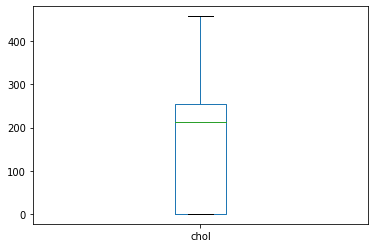

In [64]:
# check for outliers
heart['chol'].plot.box()

In [65]:
# no outliers
heart['chol'].mean(),heart['chol'].median()

(172.49, 214.0)

In [66]:
# replace 0 with 172.5
heart['chol'].replace(0,172.5,inplace=True)

In [67]:
heart['fbs'].value_counts()
# 7 missing
# replace with most freq

0    125
1     68
5      7
Name: fbs, dtype: int64

In [68]:

heart['fbs'].replace(5,0,inplace=True)

In [69]:
heart['restecg'].isnull().sum()

0

In [71]:
heart['thalach'].value_counts()
# 53 missing

0      53
140    12
120    12
110     8
130     6
112     6
118     4
150     4
128     4
105     4
100     4
160     4
106     3
102     3
117     3
86      3
84      3
125     3
108     3
122     3
135     3
148     3
180     2
165     2
98      2
111     2
96      2
119     2
154     2
80      2
138     2
127     2
129     2
162     1
161     1
157     1
93      1
94      1
73      1
97      1
69      1
99      1
159     1
88      1
132     1
155     1
107     1
151     1
131     1
113     1
115     1
145     1
144     1
141     1
121     1
123     1
124     1
126     1
133     1
149     1
Name: thalach, dtype: int64

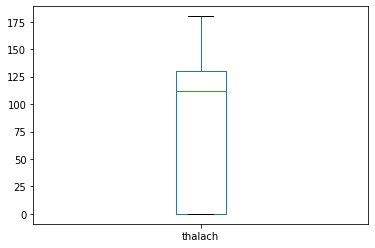

In [72]:
# check for outliers
heart['thalach'].plot.box()

In [73]:
# no outliers
heart['thalach'].mean(),heart['thalach'].median()

(90.255, 111.5)

In [74]:

heart['thalach'].replace(0,90.25,inplace=True)

In [75]:
heart['exang'].value_counts()
# 53 missing

1    95
5    53
0    52
Name: exang, dtype: int64

In [76]:
# let missing value become another class here

In [86]:
heart['oldpeak'].value_counts()
# 56 missing
# can't decide what to do

 5.0    56
 0.0    40
 2.0    25
 1.5    21
 1.0    18
 3.0    13
 2.5     9
 0.5     7
 4.0     4
 1.3     2
 1.7     1
 0.8     1
 1.6     1
 3.5     1
-0.5     1
Name: oldpeak, dtype: int64

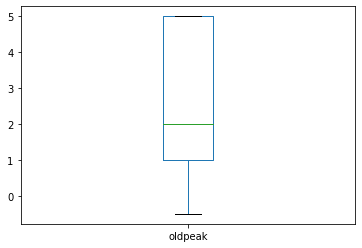

In [87]:
# check for outliers
heart['oldpeak'].plot.box()

In [88]:
# no outliers
heart['oldpeak'].mean(),heart['oldpeak'].median()

(2.351, 2.0)

In [90]:
# replace with median
heart['oldpeak'].replace(5.0,2.0,inplace=True)

In [83]:
heart['slope'].value_counts()
# 102 missing
# let missing value become another class here

5    102
2     53
3     29
1     16
Name: slope, dtype: int64

In [84]:
heart['ca'].value_counts()
# 198 missing
# let missing value become another class here

5    198
0      2
Name: ca, dtype: int64

In [85]:
heart['thal'].value_counts()
# 166 missing
# let missing value become another class here

5    166
7     22
6      8
3      4
Name: thal, dtype: int64

In [91]:
heart['goal'].isnull().sum()
# 0 missing

0

In [96]:
# now, in order to capture info from missing values, we'll create some new features
# we'll make new feat for exang, slope, ca, thal
# then we'll drop ca and thal

In [95]:
# if value is missing, substitute with 1
# if value is not missing, substitute with 0

In [100]:
heart['exangnull']=0
heart['slopenull']=0
heart['canull']=0
heart['thalnull']=0

In [101]:
for i in range(len(heart)):
    if heart['exang'][i]==5:
        heart['exangnull'][i]=1

In [104]:
for i in range(len(heart)):
    if heart['slope'][i]==5:
        heart['slopenull'][i]=1

In [105]:
for i in range(len(heart)):
    if heart['ca'][i]==5:
        heart['canull'][i]=1

In [106]:
for i in range(len(heart)):
    if heart['thal'][i]==5:
        heart['thalnull'][i]=1

In [109]:
# now, drop ca and thal
heart.drop(['ca','thal'],axis=1,inplace=True)

# EDA

# Univariate Analysis

In [110]:
heart.head(1)

,age,sex,cp,bps,chol,fbs,restecg,thalach,exang,oldpeak,slope,goal,exangnull,slopenull,canull,thalnull
0,63,1,4,140.0,260.0,0,1,112.0,1,3.0,2,2,0,0,1,1


In [113]:
heart.describe()

,age,sex,cp,bps,chol,fbs,restecg,thalach,exang,oldpeak,slope,goal,exangnull,slopenull,canull,thalnull
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,59.350000,0.970000,3.505000,123.755500,220.790000,0.340000,0.735000,114.171250,1.800000,1.511000,3.595000,1.520000,0.265000,0.510000,0.990000,0.830000
std,7.811697,0.171015,0.795701,23.340346,53.980416,0.474898,0.683455,23.709342,1.969618,0.986328,1.510757,1.219441,0.442441,0.501154,0.099748,0.376575
min,35.000000,0.000000,1.000000,96.000000,100.000000,0.000000,0.000000,69.000000,0.000000,-0.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,1.000000,3.000000,96.300000,172.500000,0.000000,0.000000,90.250000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,60.000000,1.000000,4.000000,123.000000,214.000000,0.000000,1.000000,111.500000,1.000000,2.000000,5.000000,1.000000,0.000000,1.000000,1.000000,1.000000
75%,64.000000,1.000000,4.000000,140.000000,254.500000,1.000000,1.000000,130.000000,5.000000,2.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000
max,77.000000,1.000000,4.000000,190.000000,458.000000,1.000000,2.000000,180.000000,5.000000,4.000000,5.000000,4.000000,1.000000,1.000000,1.000000,1.000000


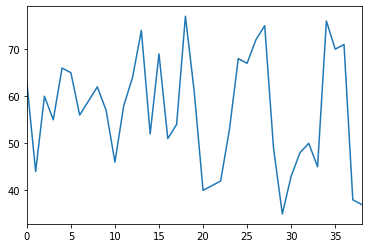

In [112]:
pd.Series(heart['age'].unique()).plot()

In [114]:
heart['sex'].value_counts()

1    194
0      6
Name: sex, dtype: int64

In [115]:
# highly unbalanced

In [116]:
heart['cp'].value_counts()

4    131
3     47
2     14
1      8
Name: cp, dtype: int64

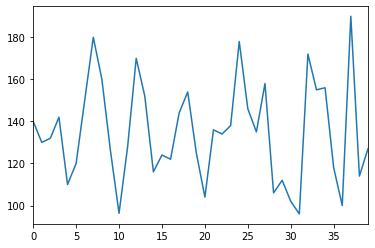

In [118]:
pd.Series(heart['bps'].unique()).plot()

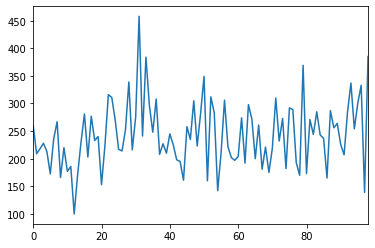

In [119]:
pd.Series(heart['chol'].unique()).plot()

In [117]:
heart['fbs'].value_counts()

0    132
1     68
Name: fbs, dtype: int64

In [121]:
heart['restecg'].value_counts()

1    93
0    80
2    27
Name: restecg, dtype: int64

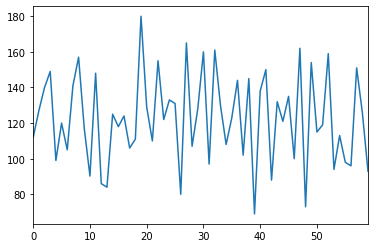

In [122]:
pd.Series(heart['thalach'].unique()).plot()

In [123]:
heart['exang'].value_counts()

1    95
5    53
0    52
Name: exang, dtype: int64

In [125]:
heart['oldpeak'].value_counts()

 2.0    81
 0.0    40
 1.5    21
 1.0    18
 3.0    13
 2.5     9
 0.5     7
 4.0     4
 1.3     2
 1.7     1
 0.8     1
 1.6     1
 3.5     1
-0.5     1
Name: oldpeak, dtype: int64

In [126]:
heart['slope'].value_counts()

5    102
2     53
3     29
1     16
Name: slope, dtype: int64

In [127]:
heart['goal'].value_counts()

1    56
0    51
3    42
2    41
4    10
Name: goal, dtype: int64

In [128]:
heart.head(1)

,age,sex,cp,bps,chol,fbs,restecg,thalach,exang,oldpeak,slope,goal,exangnull,slopenull,canull,thalnull
0,63,1,4,140.0,260.0,0,1,112.0,1,3.0,2,2,0,0,1,1


In [129]:
heart['exangnull'].value_counts()

0    147
1     53
Name: exangnull, dtype: int64

In [130]:
heart['slopenull'].value_counts()

1    102
0     98
Name: slopenull, dtype: int64

In [131]:
heart['canull'].value_counts()

1    198
0      2
Name: canull, dtype: int64

In [133]:
# highly imbalanced

In [132]:
heart['thalnull'].value_counts()

1    166
0     34
Name: thalnull, dtype: int64

In [134]:
# canull and gender are highly unbalanced
# can apply binning for less frequent cat in cp,oldpeak and slope

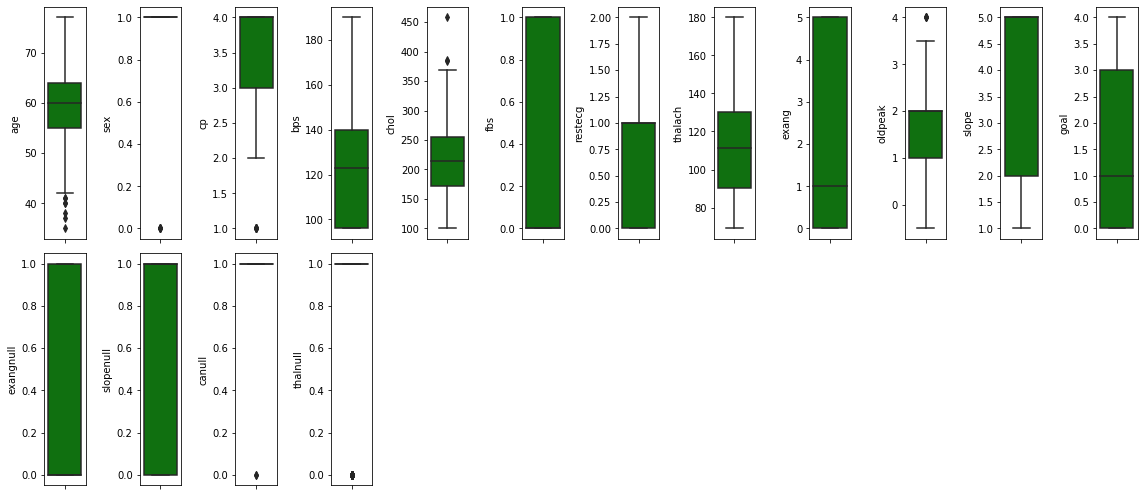

In [139]:
# let's make boxplot
cols=heart.columns.values
plt.figure(figsize=(16,48))
for i in range(len(cols)):
    plt.subplot(14,12,i+1)
    sns.boxplot(heart[cols[i]], color='green', orient='v')
    plt.tight_layout()

In [140]:
# there are outliers in age,chol,oldpeak

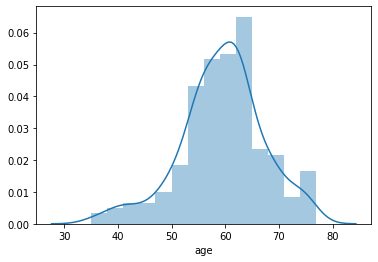

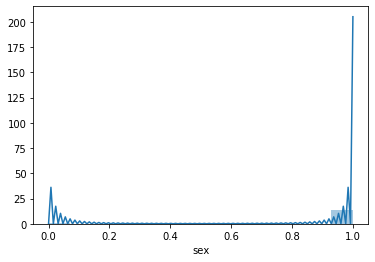

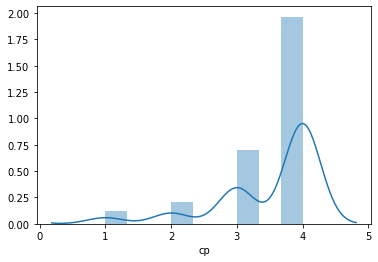

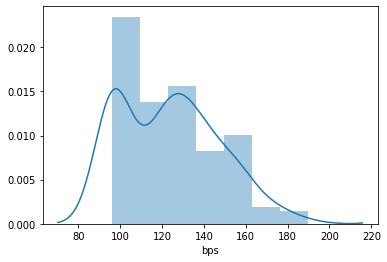

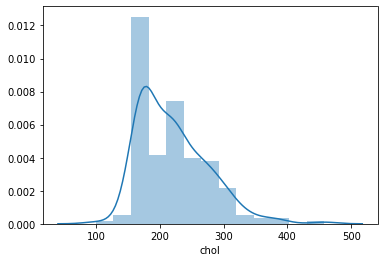

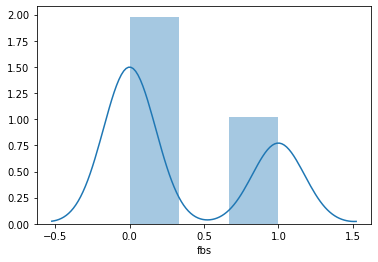

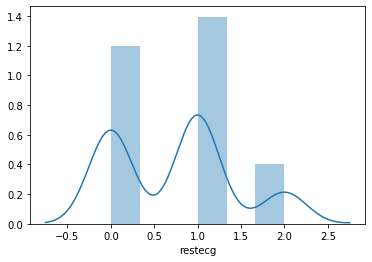

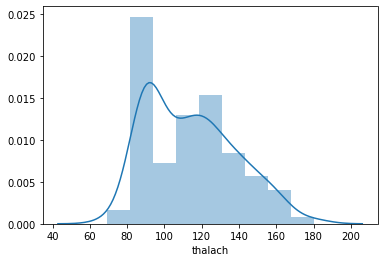

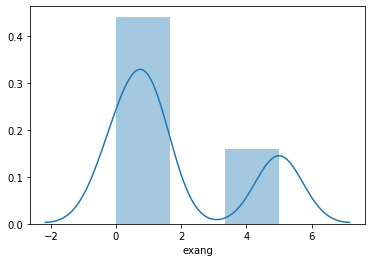

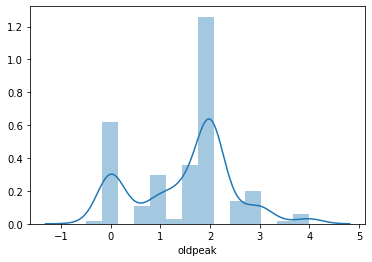

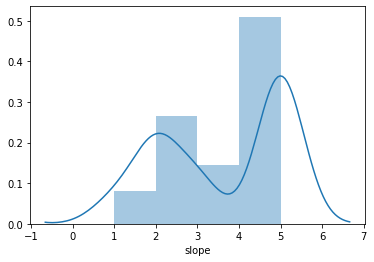

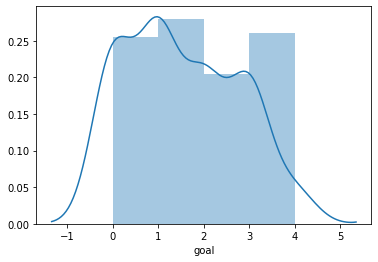

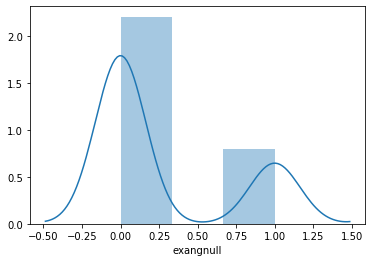

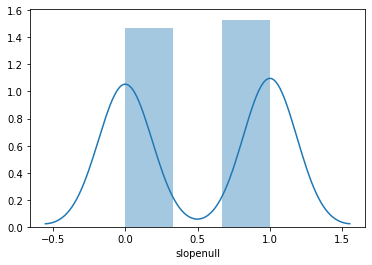

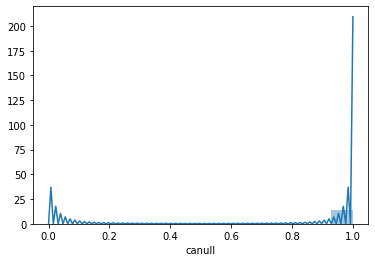

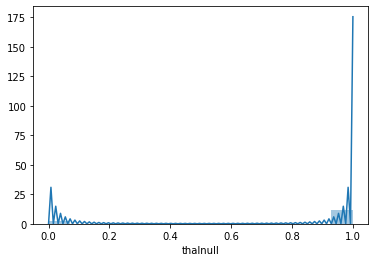

In [141]:
# Distplot
for i in cols:
    plt.subplots()
    sns.distplot(heart[i])

In [142]:
heart.skew()

age         -0.404091
sex         -5.552105
cp          -1.648734
bps          0.415026
chol         1.080531
fbs          0.680636
restecg      0.391463
thalach      0.529800
exang        0.919925
oldpeak     -0.134834
slope       -0.320715
goal         0.297393
exangnull    1.073019
slopenull   -0.040311
canull      -9.923956
thalnull    -1.770340
dtype: float64

In [143]:
# skewness should be removed from chol,thalach

# Bivariate Analysis

In [144]:
heart.head(1)

,age,sex,cp,bps,chol,fbs,restecg,thalach,exang,oldpeak,slope,goal,exangnull,slopenull,canull,thalnull
0,63,1,4,140.0,260.0,0,1,112.0,1,3.0,2,2,0,0,1,1


In [147]:
heart.groupby('goal').mean()[['age','bps','chol','thalach']]

,age,bps,chol,thalach
goal,,,,
0,56.823529,117.386275,215.617647,112.014706
1,57.571429,123.105357,218.696429,116.111607
2,61.048780,128.643902,215.097561,117.798780
3,62.452381,124.838095,234.678571,111.000000
4,62.200000,135.290000,223.900000,112.750000


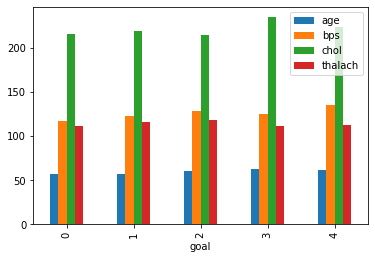

In [148]:
heart.groupby('goal').mean()[['age','bps','chol','thalach']].plot.bar()

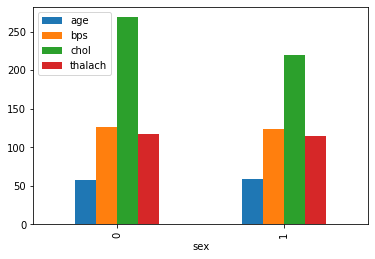

In [149]:
heart.groupby('sex').mean()[['age','bps','chol','thalach']].plot.bar()

In [160]:
pd.crosstab(heart['sex'],heart['goal'])

goal,0,1,2,3,4
sex,,,,,
0,3,3,0,0,0
1,48,53,41,42,10


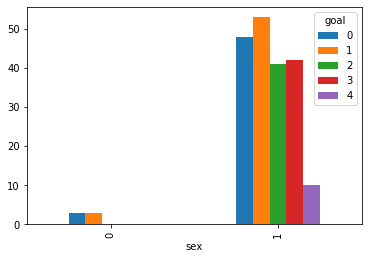

In [161]:
pd.crosstab(heart['sex'],heart['goal']).plot.bar()

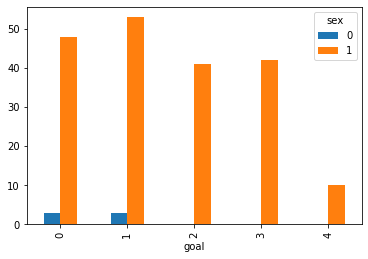

In [162]:
pd.crosstab(heart['goal'],heart['sex']).plot.bar()

In [151]:
pd.crosstab(heart['cp'],heart['goal'])

goal,0,1,2,3,4
cp,,,,,
1,3,1,1,3,0
2,9,4,1,0,0
3,16,9,8,11,3
4,23,42,31,28,7


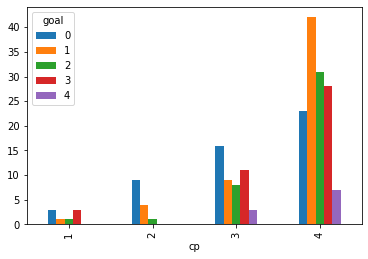

In [163]:
pd.crosstab(heart['cp'],heart['goal']).plot.bar()

In [152]:
pd.crosstab(heart['fbs'],heart['goal'])

goal,0,1,2,3,4
fbs,,,,,
0,37,34,28,27,6
1,14,22,13,15,4


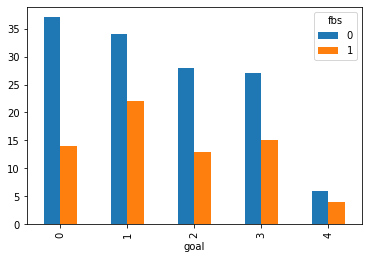

In [164]:
pd.crosstab(heart['goal'],heart['fbs']).plot.bar()

In [153]:
pd.crosstab(heart['restecg'],heart['goal'])

goal,0,1,2,3,4
restecg,,,,,
0,18,26,14,19,3
1,25,20,24,20,4
2,8,10,3,3,3


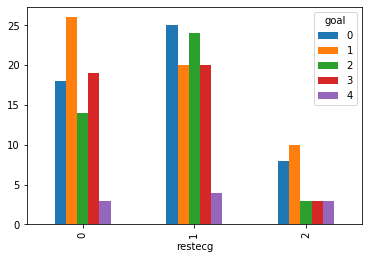

In [165]:
pd.crosstab(heart['restecg'],heart['goal']).plot.bar()

In [154]:
pd.crosstab(heart['exang'],heart['goal'])

goal,0,1,2,3,4
exang,,,,,
0,20,15,10,6,1
1,12,28,24,24,7
5,19,13,7,12,2


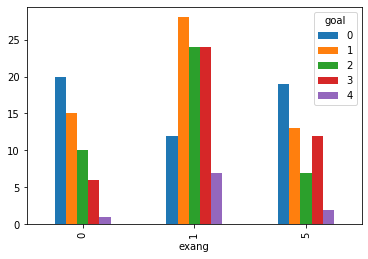

In [166]:
pd.crosstab(heart['exang'],heart['goal']).plot.bar()

In [155]:
pd.crosstab(heart['slope'],heart['goal'])

goal,0,1,2,3,4
slope,,,,,
1,3,5,3,5,0
2,9,18,13,12,1
3,3,6,9,6,5
5,36,27,16,19,4


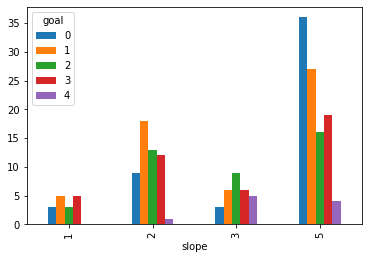

In [167]:
pd.crosstab(heart['slope'],heart['goal']).plot.bar()

In [156]:
pd.crosstab(heart['exangnull'],heart['goal'])

goal,0,1,2,3,4
exangnull,,,,,
0,32,43,34,30,8
1,19,13,7,12,2


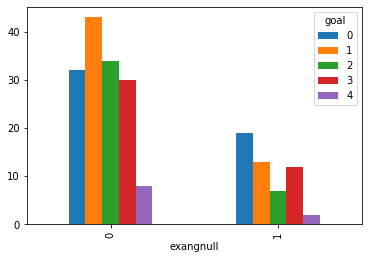

In [168]:
pd.crosstab(heart['exangnull'],heart['goal']).plot.bar()

In [157]:
pd.crosstab(heart['slopenull'],heart['goal'])

goal,0,1,2,3,4
slopenull,,,,,
0,15,29,25,23,6
1,36,27,16,19,4


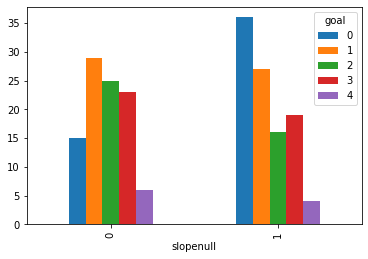

In [169]:
pd.crosstab(heart['slopenull'],heart['goal']).plot.bar()

In [158]:
pd.crosstab(heart['canull'],heart['goal'])

goal,0,1,2,3,4
canull,,,,,
0,1,1,0,0,0
1,50,55,41,42,10


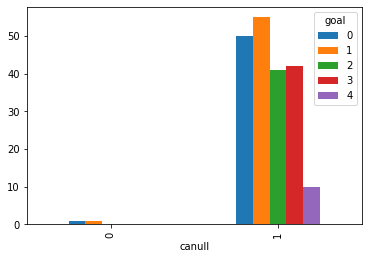

In [170]:
pd.crosstab(heart['canull'],heart['goal']).plot.bar()

In [159]:
pd.crosstab(heart['thalnull'],heart['goal'])

goal,0,1,2,3,4
thalnull,,,,,
0,8,15,8,3,0
1,43,41,33,39,10


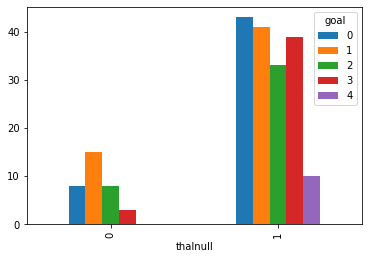

In [171]:
pd.crosstab(heart['thalnull'],heart['goal']).plot.bar()

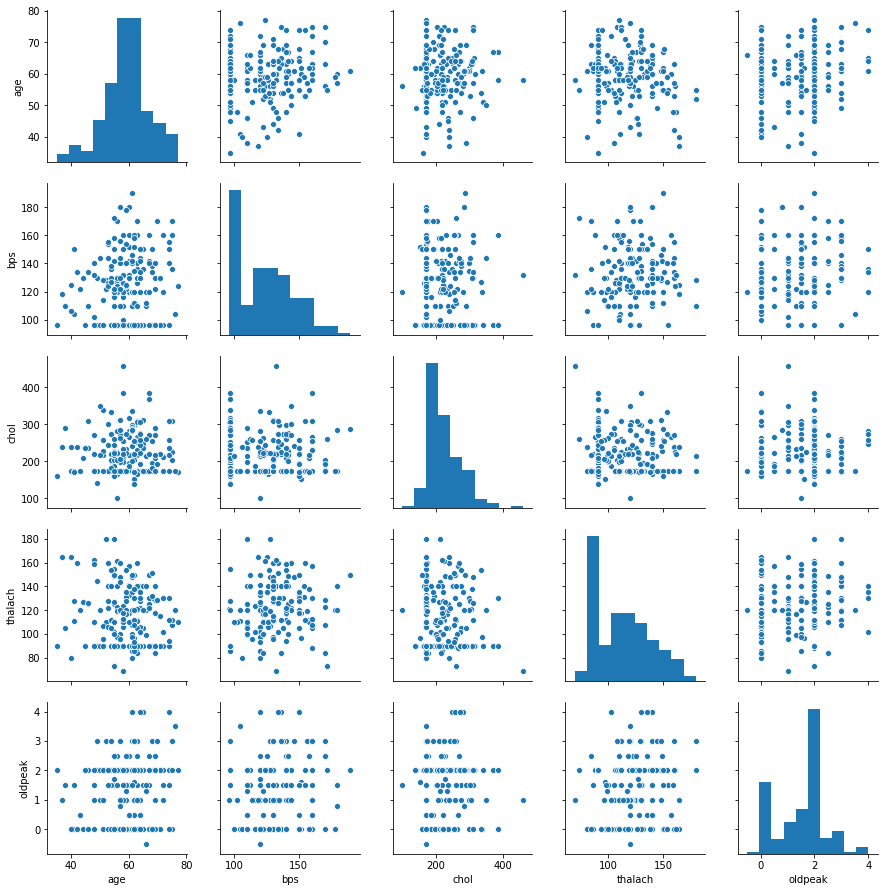

In [172]:
sns.pairplot(data=heart,vars=['age','bps','chol','thalach','oldpeak'])

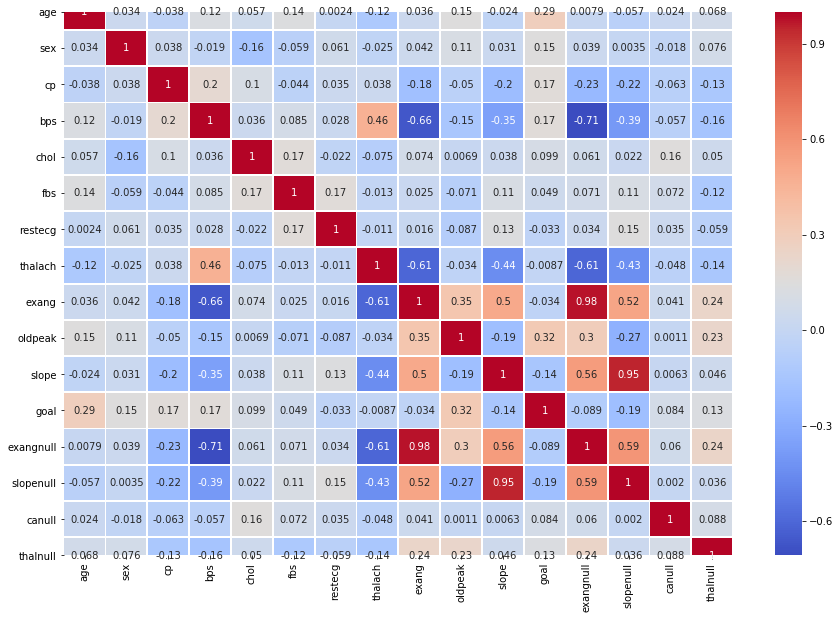

In [174]:
plt.figure(figsize=(15,10))
sns.heatmap(heart.corr(),annot=True,linewidths=0.8,cmap='coolwarm')

# Outliers

In [175]:
from scipy.stats import zscore
z=np.abs(zscore(heart))
np.where(z>3)

(array([ 28,  39,  51,  66,  72,  76,  79,  80,  82,  96,  97, 126, 128,
        131, 133, 137, 190, 195, 196, 198], dtype=int64),
 array([14, 14,  1,  2,  2,  2,  1,  4,  4,  0,  2,  1,  1,  2,  2,  2,  1,
         1,  2,  4], dtype=int64))

In [176]:
len(np.where(z>3)[0])

20

In [177]:
def outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df_out=(df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
    return(df_out.sum())

def lower(df,col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower=Q1 - 1.5 * IQR
    return lower

def upper(df,col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper=Q3 + 1.5 * IQR
    return upper

def remove_outlier(df,col):
    for i in range(df.shape[0]):
        if (df[col].iloc[i])>upper(df,col):
            df[col].iloc[i]=upper(df,col)
        elif (df[col].iloc[i])<lower(df,col):
            df[col].iloc[i]=lower(df,col)

In [178]:
# IQR method
outlier(heart)

age           7
sex           6
cp            8
bps           0
chol          3
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       4
slope         0
goal          0
exangnull     0
slopenull     0
canull        2
thalnull     34
dtype: int64

In [179]:
# outliers from age,chol and oldpeak must be treated

In [180]:
remove_outlier(heart,'age')
remove_outlier(heart,'chol')
remove_outlier(heart,'oldpeak')

In [181]:
# checking for outliers again
outlier(heart)

age           0
sex           6
cp            8
bps           0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
goal          0
exangnull     0
slopenull     0
canull        2
thalnull     34
dtype: int64

In [182]:
z=np.abs(zscore(heart))
np.where(z>3)

(array([ 28,  39,  51,  66,  72,  76,  79,  80,  82,  97, 126, 128, 131,
        133, 137, 190, 195, 196, 198], dtype=int64),
 array([14, 14,  1,  2,  2,  2,  1,  4,  4,  2,  1,  1,  2,  2,  2,  1,  1,
         2,  4], dtype=int64))

# Model Building

In [183]:
# this is a classification problem with more than 2 classes

In [184]:
# lets seperate x and y first

In [185]:
x=heart.drop('goal',axis=1)
y=heart['goal']

In [188]:
# now we'll try some iterations of feature selection and feature engineering (like binning)

In [189]:
# create a copy of x
xcopy=x.copy()

In [190]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

In [364]:
# Now, let's define some functions to reuse them
def fitc(m,x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs,stratify=y)
    m.fit(x_train,y_train)
    
def get_scorec(m,x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs,stratify=y)
    m.fit(x_train,y_train)
    train_score=m.score(x_train,y_train)
    pred=m.predict(x_test)
    test_score=accuracy_score(pred,y_test)
    return train_score,test_score

def get_predc(m,x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs,stratify=y)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    return pred

def get_metricsc(m,x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs,stratify=y)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    acc=accuracy_score(pred,y_test)
    conf=confusion_matrix(pred,y_test)
    clas=classification_report(pred,y_test)
    return acc,conf,clas

from sklearn.model_selection import GridSearchCV
def gridcvc(m,p,x,y):
    gkb=GridSearchCV(m,p,n_jobs=-1,cv=5,scoring='accuracy')
    gkb.fit(x,y)
    return gkb.best_params_


from sklearn.model_selection import RandomizedSearchCV
def randomcvc(m,p,x,y):
    from sklearn.model_selection import RandomizedSearchCV
    gkb=RandomizedSearchCV(estimator=m,param_distributions=p,
                          cv=5,n_iter=100,scoring='accuracy',
                          n_jobs=-1, verbose=5,return_train_score=True,random_state=45)
    gkb.fit(x,y)
    return gkb.best_params_

from mlxtend.feature_selection import SequentialFeatureSelector as sfs
def bfec(m,x,y,k):
    sf=sfs(m, k_features=k, forward=False, cv=5, n_jobs=-1)
    sf.fit(x,y)
    feat_names=list(sf.k_feature_names_)
    xbfe=x[feat_names]
    return xbfe

from sklearn.decomposition import PCA
def nforpcac(x):
    pca=PCA().fit(x)
    plt.figure()
    plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
    plt.xlabel('No of Components')
    plt.ylabel('Variance')
    plt.axhline(y=95, color='r', linestyle='--')
    plt.show()
    
def pcac(m,x,n):
    pca=PCA(n_components=n)
    xpca=pd.DataFrame(pca.fit_transform(x))
    return xpca

def crossc(m,x,y,c=5):
    score=cross_val_score(m,x,y,cv=c,n_jobs=-1)
    return (score.mean(), score.std())

from sklearn.preprocessing import StandardScaler
def stdc(x):
    scx=StandardScaler()
    xs=pd.DataFrame(scx.fit_transform(x), columns=x.columns)
    return xs

from sklearn.preprocessing import MinMaxScaler
def mmc(x):
    mm=MinMaxScaler()
    xm=pd.DataFrame(mm.fit_transform(x), columns=x.columns)
    return xm

def modified_bfec(m,x,y,k):
    sf=sfs(m, k_features=k, forward=False, cv=5, n_jobs=-1)
    sf.fit(x,y)
    feat_names=list(sf.k_feature_names_)
    xbfe=x[feat_names]
    x_train, x_test, y_train, y_test=train_test_split(xbfe,y,test_size=0.25,random_state=45,stratify=y)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    test_score=accuracy_score(pred,y_test)
    return test_score

def modified_pcac(m,x,y,n):
    pca=PCA(n_components=n)
    xpca=pd.DataFrame(pca.fit_transform(x))
    x_train, x_test, y_train, y_test=train_test_split(xpca,y,test_size=0.25,random_state=45,stratify=y)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    test_score=accuracy_score(pred,y_test)
    return test_score

def ttsc(x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs,stratify=y)
    return x_train, x_test, y_train, y_test

def clas(m,x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs,stratify=y)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    clas=classification_report(pred,y_test)
    return clas

In [192]:
dtc=DecisionTreeClassifier(random_state=45)
svc=SVC(random_state=45)
knnc=KNeighborsClassifier(n_jobs=-1)
rfc=RandomForestClassifier(n_jobs=-1,random_state=45)
gbc=GradientBoostingClassifier(random_state=45)
xgbc=XGBClassifier(n_jobs=-1,random_state=45)
adac=AdaBoostClassifier(random_state=45)
gnb=GaussianNB()
mnb=MultinomialNB()

# Iteration A

In [193]:
# use all features

In [223]:
print("DT ", get_scorec(dtc,x,y))
print("SVC ", get_scorec(svc,x,y))
print("KNN ", get_scorec(knnc,x,y))
print("GNB ", get_scorec(gnb,x,y))
# print("MNB ", get_scorec(mnb,x,y))
print("RF ", get_scorec(rfc,x,y))
print("GB ", get_scorec(gbc,x,y))
print("XGB ", get_scorec(xgbc,x,y))

DT  (1.0, 0.22)
SVC  (0.9666666666666667, 0.22)
KNN  (0.54, 0.34)
GNB  (0.22666666666666666, 0.14)
RF  (0.9733333333333334, 0.3)
GB  (1.0, 0.3)
XGB  (1.0, 0.24)


In [224]:
# all the models are over fitting

In [225]:
# let's look at feature importances from rfc
imp=pd.Series(rfc.feature_importances_,index=x.columns)
imp

age          0.188797
sex          0.001162
cp           0.064163
bps          0.119374
chol         0.139913
fbs          0.047435
restecg      0.078138
thalach      0.122755
exang        0.037463
oldpeak      0.099594
slope        0.037771
exangnull    0.012938
slopenull    0.022053
canull       0.000000
thalnull     0.028442
dtype: float64

In [231]:
imp.sort_values()

canull       0.000000
sex          0.001162
exangnull    0.012938
slopenull    0.022053
thalnull     0.028442
exang        0.037463
slope        0.037771
fbs          0.047435
cp           0.064163
restecg      0.078138
oldpeak      0.099594
bps          0.119374
thalach      0.122755
chol         0.139913
age          0.188797
dtype: float64

In [226]:
# so, drop ['sex','canull','thalnull','slopenull','exangnull']

# Iteration B

In [203]:
# all the features and apply feature binning on cp and slope

In [198]:
x1=x.copy()

In [246]:
# combine cat 1 and 2
for i in range(len(x1)):
    if x1['cp'][i]==1:
        x1['cp'][i]=2

In [205]:
# combine cat 3 and 1
for i in range(len(x1)):
    if x1['slope'][i]==1:
        x1['slope'][i]=3

In [207]:
print("DT ", get_scorec(dtc,x1,y))
print("SVC ", get_scorec(svc,x1,y))
print("KNN ", get_scorec(knnc,x1,y))
print("GNB ", get_scorec(gnb,x1,y))
# print("MNB ", get_scorec(mnb,x,y))
print("RF ", get_scorec(rfc,x1,y))
print("GB ", get_scorec(gbc,x1,y))
print("XGB ", get_scorec(xgbc,x1,y))

DT  (1.0, 0.24)
SVC  (0.9666666666666667, 0.22)
KNN  (0.54, 0.34)
GNB  (0.21333333333333335, 0.1)
RF  (0.98, 0.3)
GB  (1.0, 0.28)
XGB  (1.0, 0.28)


In [208]:
# some models are performing better, some are equal

# Iteration C

In [209]:
# let's try to reduce the features now

In [227]:
x2=x.copy()

In [228]:
x2.head(1)

,age,sex,cp,bps,chol,fbs,restecg,thalach,exang,oldpeak,slope,exangnull,slopenull,canull,thalnull
0,63.0,1,4,140.0,260.0,0,1,112.0,1,3.0,2,0,0,1,1


In [229]:
# let's drop canull,thalnull only
x2.drop(['sex','canull','thalnull','slopenull','exangnull'],axis=1,inplace=True)

In [230]:
print("DT ", get_scorec(dtc,x2,y))
print("SVC ", get_scorec(svc,x2,y))
print("KNN ", get_scorec(knnc,x2,y))
print("GNB ", get_scorec(gnb,x2,y))
# print("MNB ", get_scorec(mnb,x,y))
print("RF ", get_scorec(rfc,x2,y))
print("GB ", get_scorec(gbc,x2,y))
print("XGB ", get_scorec(xgbc,x2,y))

DT  (1.0, 0.2)
SVC  (0.9733333333333334, 0.22)
KNN  (0.54, 0.34)
GNB  (0.41333333333333333, 0.28)
RF  (0.96, 0.2)
GB  (1.0, 0.34)
XGB  (1.0, 0.3)


# Iteration D

In [232]:
# lets further remove slope

In [233]:
x3=x2.copy()

In [235]:
x3.drop('slope',axis=1,inplace=True)

In [236]:
print("DT ", get_scorec(dtc,x3,y))
print("SVC ", get_scorec(svc,x3,y))
print("KNN ", get_scorec(knnc,x3,y))
print("GNB ", get_scorec(gnb,x3,y))
# print("MNB ", get_scorec(mnb,x,y))
print("RF ", get_scorec(rfc,x3,y))
print("GB ", get_scorec(gbc,x3,y))
print("XGB ", get_scorec(xgbc,x3,y))

DT  (1.0, 0.18)
SVC  (0.98, 0.24)
KNN  (0.5266666666666666, 0.36)
GNB  (0.42, 0.28)
RF  (0.98, 0.36)
GB  (1.0, 0.34)
XGB  (1.0, 0.3)


In [237]:
# score improved

# Iteration E

In [238]:
# let's try binning in cp

In [253]:
x4=x3.copy()

In [254]:
x4.head(1)

,age,cp,bps,chol,fbs,restecg,thalach,exang,oldpeak
0,63.0,4,140.0,260.0,0,1,112.0,1,3.0


In [255]:
# combine cat 1, 2 and 3
for i in range(len(x4)):
    if x4['cp'][i]==1 or x4['cp'][i]==2:
        x4['cp'][i]=3

In [256]:
x4['cp'].value_counts()

4    131
3     69
Name: cp, dtype: int64

In [257]:
print("DT ", get_scorec(dtc,x4,y))
print("SVC ", get_scorec(svc,x4,y))
print("KNN ", get_scorec(knnc,x4,y))
print("GNB ", get_scorec(gnb,x4,y))
# print("MNB ", get_scorec(mnb,x,y))
print("RF ", get_scorec(rfc,x4,y))
print("GB ", get_scorec(gbc,x4,y))
print("XGB ", get_scorec(xgbc,x4,y))

DT  (1.0, 0.28)
SVC  (0.98, 0.24)
KNN  (0.5266666666666666, 0.36)
GNB  (0.43333333333333335, 0.28)
RF  (0.9933333333333333, 0.32)
GB  (1.0, 0.32)
XGB  (1.0, 0.3)


# Conclusion

In [259]:
# for DT, use x4
# for rest use x3

# Iteration 1

In [260]:
print("DT ", get_scorec(dtc,x3,y))
print("SVC ", get_scorec(svc,x3,y))
print("KNN ", get_scorec(knnc,x3,y))
print("GNB ", get_scorec(gnb,x3,y))
# print("MNB ", get_scorec(mnb,x,y))
print("RF ", get_scorec(rfc,x3,y))
print("GB ", get_scorec(gbc,x3,y))
print("XGB ", get_scorec(xgbc,x3,y))

DT  (1.0, 0.18)
SVC  (0.98, 0.24)
KNN  (0.5266666666666666, 0.36)
GNB  (0.42, 0.28)
RF  (0.98, 0.36)
GB  (1.0, 0.34)
XGB  (1.0, 0.3)


# Iteration 2

In [262]:
# use std scaling on data
x3s=stdc(x3)

In [263]:
print("DT ", get_scorec(dtc,x3s,y))
print("SVC ", get_scorec(svc,x3s,y))
print("KNN ", get_scorec(knnc,x3s,y))
print("GNB ", get_scorec(gnb,x3s,y))
# print("MNB ", get_scorec(mnb,x,y))
print("RF ", get_scorec(rfc,x3s,y))
print("GB ", get_scorec(gbc,x3s,y))
print("XGB ", get_scorec(xgbc,x3s,y))

DT  (1.0, 0.22)
SVC  (0.62, 0.34)
KNN  (0.5266666666666666, 0.32)
GNB  (0.42, 0.28)
RF  (0.9733333333333334, 0.36)
GB  (1.0, 0.34)
XGB  (1.0, 0.3)


In [264]:
# only SVC improved

# Iteration 3

In [266]:
# use min max scaling
x3m=mmc(x3)

In [267]:
print("DT ", get_scorec(dtc,x3m,y))
print("SVC ", get_scorec(svc,x3m,y))
print("KNN ", get_scorec(knnc,x3m,y))
print("GNB ", get_scorec(gnb,x3m,y))
# print("MNB ", get_scorec(mnb,x,y))
print("RF ", get_scorec(rfc,x3m,y))
print("GB ", get_scorec(gbc,x3m,y))
print("XGB ", get_scorec(xgbc,x3m,y))

DT  (1.0, 0.18)
SVC  (0.3466666666666667, 0.32)
KNN  (0.5533333333333333, 0.34)
GNB  (0.42, 0.28)
RF  (0.98, 0.36)
GB  (1.0, 0.34)
XGB  (1.0, 0.3)


In [268]:
# std scaling was better than mm

# Iteration 4

In [271]:
# lets remove skewness from chol,thalach

In [272]:
x3_sk=x3.copy()

In [279]:
# x3_sk['chol'].min(), x3_sk['chol'].max()
x3_sk['chol']=np.log(x3_sk['chol'])
# skewness reduced to 0.311

In [282]:
# x3_sk['thalach'].min(), x3_sk['thalach'].max()
x3_sk['thalach']=np.log(x3_sk['thalach'])
# skewness reduced to 0.311

In [283]:
print("DT ", get_scorec(dtc,x3_sk,y))
print("SVC ", get_scorec(svc,x3_sk,y))
print("KNN ", get_scorec(knnc,x3_sk,y))
print("GNB ", get_scorec(gnb,x3_sk,y))
# print("MNB ", get_scorec(mnb,x,y))
print("RF ", get_scorec(rfc,x3_sk,y))
print("GB ", get_scorec(gbc,x3_sk,y))
print("XGB ", get_scorec(xgbc,x3_sk,y))

DT  (1.0, 0.22)
SVC  (0.82, 0.22)
KNN  (0.49333333333333335, 0.22)
GNB  (0.42, 0.26)
RF  (0.98, 0.36)
GB  (1.0, 0.36)
XGB  (1.0, 0.3)


# Iteration 5

In [284]:
# std scale x3_sk
x3s_sk=stdc(x3_sk)

In [285]:
print("DT ", get_scorec(dtc,x3s_sk,y))
print("SVC ", get_scorec(svc,x3s_sk,y))
print("KNN ", get_scorec(knnc,x3s_sk,y))
print("GNB ", get_scorec(gnb,x3s_sk,y))
# print("MNB ", get_scorec(mnb,x,y))
print("RF ", get_scorec(rfc,x3s_sk,y))
print("GB ", get_scorec(gbc,x3s_sk,y))
print("XGB ", get_scorec(xgbc,x3s_sk,y))

DT  (1.0, 0.22)
SVC  (0.6333333333333333, 0.36)
KNN  (0.5333333333333333, 0.32)
GNB  (0.42, 0.26)
RF  (0.9733333333333334, 0.36)
GB  (1.0, 0.36)
XGB  (1.0, 0.3)


# Conclusion

In [287]:
# we'll make 3 models
# SVC, RF and GB

In [286]:
# Dt with x4
# SVC with x3s_sk 0.6333333333333333, 0.36
# RF x3s_sk 0.9733333333333334, 0.36
# GB x3s_sk 1.0, 0.36

# SVC

In [288]:
# SVC with x3s_sk 0.6333333333333333, 0.36

In [289]:
# svc=SVC(random_state=45)

In [290]:
# Individual Model Pipeline:
# 1. feature selection
# 2. Hyper parameter tuning
# 3. Boosting
# 4. Cross Validation
# 5. Evaluation Metrics

In [292]:
# let's apply BFE
# there are 9 features
for i in range(5,9):
    print(i," ",modified_bfec(svc,x3s_sk,y,i))

5   0.42
6   0.4
7   0.36
8   0.34


In [293]:
# at k=5, best results
x3s_sk_bfe1=bfec(svc,x3s_sk,y,5)
x3s_sk_bfe1.head()

,bps,chol,fbs,exang,oldpeak
0,0.697730,0.845494,-0.717741,-0.407189,1.560190
1,0.268212,-0.116277,-0.717741,-0.916176,-1.562272
2,0.354116,0.069432,-0.717741,-0.407189,-0.001041
3,0.783634,0.266989,-0.717741,-0.407189,1.039780
4,-0.590823,-0.032772,1.393261,-0.407189,-0.209205


In [294]:
get_scorec(svc,x3s_sk_bfe1,y)

(0.47333333333333333, 0.42)

In [319]:
c=clas(svc,x3s_sk_bfe1,y)
print(c)

              precision    recall  f1-score   support

           0       0.46      0.55      0.50        11
           1       0.79      0.44      0.56        25
           2       0.20      0.22      0.21         9
           3       0.20      0.40      0.27         5
           4       0.00      0.00      0.00         0

    accuracy                           0.42        50
   macro avg       0.33      0.32      0.31        50
weighted avg       0.55      0.42      0.46        50



In [295]:
# the model overfits less
# the score also improved

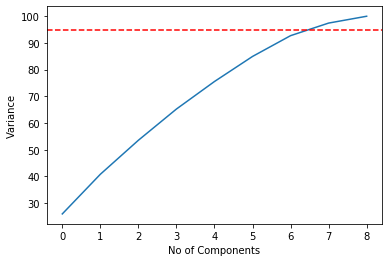

In [296]:
# let's apply PCA
nforpcac(x3s_sk)

In [297]:
# n from 6 to 9
for i in range(6,9):
        print(i," ",modified_pcac(svc,x3s_sk,y,i))

6   0.36
7   0.38
8   0.36


In [298]:
# we will use BFE not PCA

In [301]:
# let's tune svc,x3s_sk_bfe1

In [302]:
param_svc={'kernel':['rbf','poly','linear'],'decision_function_shape':['ovo', 'ovr']}
gridcvc(svc,param_svc,x3s_sk_bfe1,y)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'decision_function_shape': 'ovo', 'kernel': 'poly'}

In [305]:
svc1=SVC(random_state=45,kernel='poly',decision_function_shape='ovo')
param_svc1={'C':[0.5,1,1.3,1.4,1.5,1.6,1.7],'gamma':['auto',0.1,0.2,0.3,0.4,0.5,0.6]}
gridcvc(svc1,param_svc1,x3s_sk_bfe1,y)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 1.6, 'gamma': 0.4}

In [306]:
svc2=SVC(random_state=45,kernel='poly',decision_function_shape='ovo',C= 1.6,gamma= 0.4)
get_scorec(svc2,x3s_sk_bfe1,y)

(0.6266666666666667, 0.36)

In [307]:
# score decreased and model overfits again

In [311]:
svc3=SVC(random_state=45,kernel='rbf',C= 1.6,gamma= 0.4)
get_scorec(svc3,x3s_sk_bfe1,y)

(0.6, 0.42)

In [312]:
svc4=SVC(random_state=45,kernel='rbf')
param_svc2={'C':[0.01,0.05,0.1,0.5,1,1.3,1.4,1.5,1.6,1.7],'gamma':['auto',0.1,0.2,0.3,0.4,0.5,0.6]}
gridcvc(svc4,param_svc2,x3s_sk_bfe1,y)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 0.5, 'gamma': 0.3}

In [313]:
svc5=SVC(random_state=45,kernel='rbf',C= 0.5, gamma= 0.3)
get_scorec(svc5,x3s_sk_bfe1,y)

(0.4533333333333333, 0.38)

In [320]:
c=clas(svc5,x3s_sk_bfe1,y)
print(c)

              precision    recall  f1-score   support

           0       0.46      0.55      0.50        11
           1       0.79      0.38      0.51        29
           2       0.20      0.25      0.22         8
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         0

    accuracy                           0.38        50
   macro avg       0.29      0.23      0.25        50
weighted avg       0.59      0.38      0.44        50



In [314]:
# the score reduced

In [321]:
svc6=SVC(random_state=45,kernel='poly')
get_scorec(svc6,x3s_sk_bfe1,y)

(0.52, 0.38)

In [322]:
c=clas(svc6,x3s_sk_bfe1,y)
print(c)

              precision    recall  f1-score   support

           0       0.46      0.43      0.44        14
           1       0.79      0.42      0.55        26
           2       0.20      0.33      0.25         6
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         1

    accuracy                           0.38        50
   macro avg       0.29      0.24      0.25        50
weighted avg       0.56      0.38      0.44        50



In [323]:
# svc,x3s_sk_bfe1,y is the best

In [325]:
svc=SVC(random_state=45,probability=True)

In [334]:
# let's boost svc,x3s_sk_bfe1,y
adasvc=AdaBoostClassifier(base_estimator=svc, learning_rate=0.01, n_estimators=90, random_state=45)
get_scorec(adasvc,x3s_sk_bfe1,y)

(0.37333333333333335, 0.4)

In [335]:
# tried various iterations, but the score didn't improve

In [336]:
# cross validate svc,x3s_sk_bfe1,y
crossc(svc,x3s_sk_bfe1,y,2)

(0.394989498949895, 0.0010501050105010679)

In [337]:
# no under fitting or over fitting

In [338]:
# Evaluation metrics
acc, conf, c=get_metricsc(svc,x3s_sk_bfe1,y)
print(acc)
print(' ')
print(conf)
print(' ')
print(clas)

0.42
 
[[ 6  2  2  1  0]
 [ 5 11  5  4  0]
 [ 2  0  2  3  2]
 [ 0  1  1  2  1]
 [ 0  0  0  0  0]]
 
              precision    recall  f1-score   support

           0       0.46      0.55      0.50        11
           1       0.79      0.44      0.56        25
           2       0.20      0.22      0.21         9
           3       0.20      0.40      0.27         5
           4       0.00      0.00      0.00         0

    accuracy                           0.42        50
   macro avg       0.33      0.32      0.31        50
weighted avg       0.55      0.42      0.46        50



In [339]:
# let's try feature binning on y as well
y1=y.copy()

In [340]:
# combine cat 4, 2 and 3
for i in range(len(y1)):
    if y1[i]==4 or y1[i]==2 or y1[i]==3:
        y1[i]=5

In [341]:
y1.value_counts()

5    93
1    56
0    51
Name: goal, dtype: int64

In [342]:
get_scorec(svc,x3s_sk_bfe1,y1)

(0.5533333333333333, 0.58)

In [343]:
# the score has improved

In [354]:
# let's boost svc,x3s_sk_bfe1,y1
adasvc2=AdaBoostClassifier(base_estimator=svc, learning_rate=0.001, n_estimators=50, random_state=45)
get_scorec(adasvc2,x3s_sk_bfe1,y1)

(0.5266666666666666, 0.56)

In [355]:
# still, the best result is svc,x3s_sk_bfe1,y1

In [356]:
# cross validate svc,x3s_sk_bfe1,y1
crossc(svc,x3s_sk_bfe1,y1,2)

(0.5045004500450045, 0.04995499549954999)

In [357]:
# no under or over fitting

In [358]:
# Evaluation metrics
acc, conf, c=get_metricsc(svc,x3s_sk_bfe1,y1)
print(acc)
print(' ')
print(conf)
print(' ')
print(clas)

0.58
 
[[ 6  2  1]
 [ 0  2  1]
 [ 7 10 21]]
 
              precision    recall  f1-score   support

           0       0.46      0.67      0.55         9
           1       0.14      0.67      0.24         3
           5       0.91      0.55      0.69        38

    accuracy                           0.58        50
   macro avg       0.51      0.63      0.49        50
weighted avg       0.79      0.58      0.64        50



# RF

In [359]:
# RF x3s_sk,y 0.9733333333333334, 0.36

In [360]:
# rfc=RandomForestClassifier(n_jobs=-1,random_state=45)

In [361]:
# Individual Model Pipeline:
# 1. feature selection
# 2. Hyper parameter tuning
# 3. Boosting
# 4. Cross Validation
# 5. Evaluation Metrics

In [362]:
get_scorec(rfc,x3s_sk,y1)

(0.9866666666666667, 0.46)

In [365]:
# the score improved, but the model is over fitting a lot
c=clas(rfc,x3s_sk,y1)
print(c)

              precision    recall  f1-score   support

           0       0.31      0.40      0.35        10
           1       0.43      0.35      0.39        17
           5       0.57      0.57      0.57        23

    accuracy                           0.46        50
   macro avg       0.43      0.44      0.43        50
weighted avg       0.47      0.46      0.46        50



In [366]:
# now, lets apply BFE
for i in range(5,9):
    print(i," ",modified_bfec(rfc,x3s_sk,y1,i))

5   0.42
6   0.44
7   0.42
8   0.4


In [367]:
# we won't use BFE

In [369]:
# let's use PCA
# n from 5 to 9
for i in range(5,9):
        print(i," ",modified_pcac(rfc,x3s_sk,y1,i))

5   0.52
6   0.58
7   0.52
8   0.56


In [370]:
# at n=6, the score is best

In [372]:
x3s_sk_pca1=pcac(rfc,x3s_sk,6)
x3s_sk_pca1.head()

,0,1,2,3,4,5
0,-0.291879,0.354276,1.338584,-0.713719,-1.047818,-0.675764
1,-1.623154,-1.226587,-1.989747,-0.850549,0.198381,-0.279081
2,-1.099270,-0.321035,0.208602,-0.291341,-0.680364,-0.278155
3,-1.235089,-0.527637,0.636825,-0.458943,-0.901475,-1.392064
4,0.412472,1.826555,-0.972968,1.354884,-0.492617,0.111489


In [373]:
get_scorec(rfc,x3s_sk_pca1,y1)

(0.9733333333333334, 0.58)

In [374]:
# the score improved, but the model is still over fitting
c=clas(rfc,x3s_sk_pca1,y1)
print(c)

              precision    recall  f1-score   support

           0       0.46      0.46      0.46        13
           1       0.50      0.41      0.45        17
           5       0.70      0.80      0.74        20

    accuracy                           0.58        50
   macro avg       0.55      0.56      0.55        50
weighted avg       0.57      0.58      0.57        50



In [375]:
# let's tune rfc,x3s_sk_pca1,y1
param_rfc={'max_features':['auto','sqrt','log2'],'criterion':['gini','entropy']}
gridcvc(rfc,param_rfc,x3s_sk_pca1,y1)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'criterion': 'entropy', 'max_features': 'auto'}

In [376]:
rfc1=RandomForestClassifier(n_jobs=-1,random_state=45,max_features= 'auto',criterion= 'entropy')

In [379]:
get_scorec(rfc1,x3s_sk_pca1,y1)

(0.9866666666666667, 0.5)

In [380]:
# still over fitting and score reduced

In [377]:
param_rfc1={'max_depth':range(2,5),'min_samples_split':[2,4,8,12,16],
          'min_samples_leaf':[1,2,4,8],'min_weight_fraction_leaf':[0.0,0.1,0.2,0.4,0.5]}
gridcvc(rfc1,param_rfc1,x3s_sk_pca1,y1)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'max_depth': 3,
 'min_samples_leaf': 8,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0}

In [378]:
# took around 2 minutes

In [381]:
param_rfc2={'max_depth':range(3,7),'min_samples_split':[2,3,4,5],
          'min_samples_leaf':[4,7,8,9]}
gridcvc(rfc1,param_rfc2,x3s_sk_pca1,y1)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 2}

In [382]:
rfc2=RandomForestClassifier(n_jobs=-1,random_state=45,max_features= 'auto',criterion= 'entropy',
                           max_depth= 5, min_samples_leaf= 8, min_samples_split= 2, min_weight_fraction_leaf= 0.0)
get_scorec(rfc2,x3s_sk_pca1,y1)

(0.6733333333333333, 0.5)

In [383]:
# the over fitting reduced

In [384]:
rfc3=RandomForestClassifier(n_jobs=-1,random_state=45,max_features= 'auto',criterion= 'entropy',
                           max_depth= 3, min_samples_leaf= 8, min_samples_split= 2, min_weight_fraction_leaf= 0.0)
get_scorec(rfc3,x3s_sk_pca1,y1)

(0.6333333333333333, 0.56)

In [385]:
# over fitting reduced and score improved

In [392]:
rfc4=RandomForestClassifier(n_jobs=-1,random_state=45,max_features= 'auto',criterion= 'entropy',
                           max_depth= 3, min_samples_leaf= 8, min_samples_split= 2, min_weight_fraction_leaf= 0.2)
get_scorec(rfc4,x3s_sk_pca1,y1)

(0.5733333333333334, 0.54)

In [393]:
# over fitting reduced further

In [394]:
# compare rf3 and rfc4 using classification metrics
c=clas(rfc3,x3s_sk_pca1,y1)
print(c)

              precision    recall  f1-score   support

           0       0.46      0.46      0.46        13
           1       0.14      0.50      0.22         4
           5       0.87      0.61      0.71        33

    accuracy                           0.56        50
   macro avg       0.49      0.52      0.47        50
weighted avg       0.71      0.56      0.61        50



In [395]:
c=clas(rfc4,x3s_sk_pca1,y1)
print(c)

              precision    recall  f1-score   support

           0       0.23      0.60      0.33         5
           1       0.14      0.50      0.22         4
           5       0.96      0.54      0.69        41

    accuracy                           0.54        50
   macro avg       0.44      0.55      0.41        50
weighted avg       0.82      0.54      0.61        50



In [396]:
# rfc3 is better

In [397]:
param_rfc3={'n_estimators':range(50,400,100)}
gridcvc(rfc3,param_rfc3,x3s_sk_pca1,y1)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_estimators': 250}

In [398]:
# took around 1/2 minutes

In [401]:
param_rfc4={'n_estimators':range(600,700,10)}
gridcvc(rfc3,param_rfc4,x3s_sk_pca1,y1)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_estimators': 610}

In [402]:
rfc5=RandomForestClassifier(n_jobs=-1,random_state=45,max_features= 'auto',criterion= 'entropy',
                           max_depth= 3, min_samples_leaf= 8, min_samples_split= 2, min_weight_fraction_leaf= 0.0,
                           n_estimators=610)
get_scorec(rfc5,x3s_sk_pca1,y1)

(0.6866666666666666, 0.56)

In [403]:
# over fitting increased, the score is same

In [409]:
rfc6=RandomForestClassifier(n_jobs=-1,random_state=45,max_features= 'auto',criterion= 'entropy',
                           max_depth= 3, min_samples_leaf= 8, min_samples_split= 2, min_weight_fraction_leaf= 0.0,
                           n_estimators=240)
get_scorec(rfc6,x3s_sk_pca1,y1)

(0.66, 0.58)

In [410]:
# over fitting reduced, score also improved

In [421]:
# let's boost rfc6,x3s_sk_pca1,y1
adarfc=AdaBoostClassifier(base_estimator=rfc6, learning_rate= 0.04, n_estimators=40, random_state=45)
get_scorec(adarfc,x3s_sk_pca1,y1)

(0.74, 0.58)

In [423]:
# took around 1:30 minutes
# the above score is the best
# rfc6,x3s_sk_pca1,y1 is the best

In [424]:
# let's do further binning in y1 to make the model more generalized

In [425]:
y2=y1.copy()

In [426]:
y2.value_counts()

5    93
1    56
0    51
Name: goal, dtype: int64

In [427]:
# lets combine 1 and 0 in a class named 4
for i in range(len(y2)):
    if y2[i]==0 or y2[i]==1:
        y2[i]=4

In [428]:
y2.value_counts()

4    107
5     93
Name: goal, dtype: int64

In [429]:
get_scorec(rfc6,x3s_sk_pca1,y2)

(0.7333333333333333, 0.64)

In [430]:
# the score improved

In [431]:
# lets cross validate rfc6,x3s_sk_pca1,y2
crossc(rfc6,x3s_sk_pca1,y2,3)

(0.6301824212271973, 0.02853175876299379)

In [432]:
# no over or under fitting

In [434]:
# Evaluation metrics
acc, conf, c=get_metricsc(rfc6,x3s_sk_pca1,y2)
print(acc)
print(' ')
print(conf)
print(' ')
print(c)

0.64
 
[[22 13]
 [ 5 10]]
 
              precision    recall  f1-score   support

           4       0.81      0.63      0.71        35
           5       0.43      0.67      0.53        15

    accuracy                           0.64        50
   macro avg       0.62      0.65      0.62        50
weighted avg       0.70      0.64      0.65        50



In [435]:
# lets cross validate rfc6,x3s_sk_pca1,y1
crossc(rfc6,x3s_sk_pca1,y1,3)

(0.5150007538067239, 0.01828008504602585)

In [436]:
# Evaluation metrics
acc, conf, c=get_metricsc(rfc6,x3s_sk_pca1,y1)
print(acc)
print(' ')
print(conf)
print(' ')
print(c)

0.58
 
[[ 4  3  1]
 [ 2  3  0]
 [ 7  8 22]]
 
              precision    recall  f1-score   support

           0       0.31      0.50      0.38         8
           1       0.21      0.60      0.32         5
           5       0.96      0.59      0.73        37

    accuracy                           0.58        50
   macro avg       0.49      0.56      0.48        50
weighted avg       0.78      0.58      0.64        50



# GradientBoosting

In [437]:
# GB x3s_sk,y 1.0, 0.36

In [438]:
# gbc=GradientBoostingClassifier(random_state=45)

In [439]:
# Individual Model Pipeline:
# 1. feature selection
# 2. Hyper parameter tuning
# 3. Boosting
# 4. Cross Validation
# 5. Evaluation Metrics

In [440]:
get_scorec(gbc,x3s_sk,y2)

(0.98, 0.62)

In [441]:
# the score improved

In [442]:
c=clas(gbc,x3s_sk,y2)
print(c)

              precision    recall  f1-score   support

           4       0.63      0.65      0.64        26
           5       0.61      0.58      0.60        24

    accuracy                           0.62        50
   macro avg       0.62      0.62      0.62        50
weighted avg       0.62      0.62      0.62        50



In [443]:
# lets apply BFE
for i in range(5,9):
    print(i," ",modified_bfec(gbc,x3s_sk,y2,i))

5   0.7
6   0.7
7   0.68
8   0.68


In [444]:
# the score is best at 5 and 6
# let's compare them with classification report

In [446]:
x3s_sk_bfe2=bfec(gbc,x3s_sk,y2,5)
x3s_sk_bfe2.head()

,age,cp,restecg,exang,oldpeak
0,0.471170,0.623654,0.388709,-0.407189,1.560190
1,-2.045267,0.623654,0.388709,-0.916176,-1.562272
2,0.073838,0.623654,0.388709,-0.407189,-0.001041
3,-0.588383,0.623654,0.388709,-0.407189,1.039780
4,0.868502,-0.636253,1.855535,-0.407189,-0.209205


In [447]:
x3s_sk_bfe3=bfec(gbc,x3s_sk,y2,6)
x3s_sk_bfe3.head()

,age,cp,fbs,restecg,exang,oldpeak
0,0.471170,0.623654,-0.717741,0.388709,-0.407189,1.560190
1,-2.045267,0.623654,-0.717741,0.388709,-0.916176,-1.562272
2,0.073838,0.623654,-0.717741,0.388709,-0.407189,-0.001041
3,-0.588383,0.623654,-0.717741,0.388709,-0.407189,1.039780
4,0.868502,-0.636253,1.393261,1.855535,-0.407189,-0.209205


In [448]:
get_scorec(gbc,x3s_sk_bfe2,y2), get_scorec(gbc,x3s_sk_bfe3,y2)

((0.9266666666666666, 0.7), (0.9533333333333334, 0.7))

In [449]:
c=clas(gbc,x3s_sk_bfe2,y2)
print(c)

              precision    recall  f1-score   support

           4       0.78      0.70      0.74        30
           5       0.61      0.70      0.65        20

    accuracy                           0.70        50
   macro avg       0.69      0.70      0.69        50
weighted avg       0.71      0.70      0.70        50



In [450]:
c=clas(gbc,x3s_sk_bfe3,y2)
print(c)

              precision    recall  f1-score   support

           4       0.78      0.70      0.74        30
           5       0.61      0.70      0.65        20

    accuracy                           0.70        50
   macro avg       0.69      0.70      0.69        50
weighted avg       0.71      0.70      0.70        50



In [451]:
# less over fitting with 5 features
# so, we'll use gbc,x3s_sk_bfe2,y2

In [452]:
# let's use PCA
# n from 5 to 9
for i in range(5,9):
        print(i," ",modified_pcac(gbc,x3s_sk,y2,i))

5   0.56
6   0.7
7   0.66
8   0.62


In [453]:
# let's take n=6
x3s_sk_pca2=pcac(gbc,x3s_sk,6)
x3s_sk_pca2.head()

,0,1,2,3,4,5
0,-0.291879,0.354276,1.338584,-0.713719,-1.047818,-0.675764
1,-1.623154,-1.226587,-1.989747,-0.850549,0.198381,-0.279081
2,-1.099270,-0.321035,0.208602,-0.291341,-0.680364,-0.278155
3,-1.235089,-0.527637,0.636825,-0.458943,-0.901475,-1.392064
4,0.412472,1.826555,-0.972968,1.354884,-0.492617,0.111489


In [454]:
c=clas(gbc,x3s_sk_pca2,y2)
print(c)

              precision    recall  f1-score   support

           4       0.67      0.75      0.71        24
           5       0.74      0.65      0.69        26

    accuracy                           0.70        50
   macro avg       0.70      0.70      0.70        50
weighted avg       0.70      0.70      0.70        50



In [455]:
get_scorec(gbc,x3s_sk_pca2,y2)

(0.9866666666666667, 0.7)

In [456]:
# the pca model over fits more

In [457]:
# lets tune gbc,x3s_sk_bfe2,y2

In [458]:
GradientBoostingClassifier?

In [459]:
param_gbc={'loss':['deviance', 'exponential'],'max_features':['auto','sqrt','log2'],'warm_start':[True,False]}
gridcvc(gbc,param_gbc,x3s_sk_bfe2,y2)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'loss': 'deviance', 'max_features': 'sqrt', 'warm_start': True}

In [460]:
gbc1=GradientBoostingClassifier(random_state=45,loss= 'deviance', max_features= 'sqrt', warm_start= True)

In [461]:
param_gbc1={'learning_rate':[0.001,0.005,0.01,0.1,0.5,1],'min_samples_split':[2,4,6,8,12],
            'min_samples_leaf':[1,2,4,8,12],'min_weight_fraction_leaf':[0.0,0.1,0.2,0.3,0.4,0.5],
           'max_depth':[2,4,6,8]}
gridcvc(gbc1,param_gbc1,x3s_sk_bfe2,y2)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'learning_rate': 0.1,
 'max_depth': 8,
 'min_samples_leaf': 12,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0}

In [462]:
# took around 6 minutes

In [463]:
param_gbc2={'learning_rate':[0.05,0.1,0.2,0.3],'min_samples_split':[2,3,4],
            'min_samples_leaf':[10,11,12,13],
           'max_depth':[6,7,8,9,10]}
gridcvc(gbc1,param_gbc2,x3s_sk_bfe2,y2)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'learning_rate': 0.1,
 'max_depth': 7,
 'min_samples_leaf': 12,
 'min_samples_split': 2}

In [464]:
gbc2=GradientBoostingClassifier(random_state=45,loss= 'deviance', max_features= 'sqrt', warm_start= True,
                               learning_rate= 0.1,
 max_depth= 7,
 min_samples_leaf= 12,
 min_samples_split= 2)

In [466]:
param_gbc3={'n_estimators':range(30,100,10)}
gridcvc(gbc2,param_gbc3,x3s_sk_bfe2,y2)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_estimators': 60}

In [468]:
gbc3=GradientBoostingClassifier(random_state=45,loss= 'deviance', max_features= 'sqrt', warm_start= True,
                               learning_rate= 0.1,
 max_depth= 7,
 min_samples_leaf= 12,
 min_samples_split= 2,n_estimators=60)
get_scorec(gbc3,x3s_sk_bfe2,y2)

(0.8866666666666667, 0.7)

In [469]:
# model is over fitting less

In [472]:
gbc4=GradientBoostingClassifier(random_state=45,loss= 'deviance', max_features= 'sqrt', warm_start= True,
                               learning_rate= 0.1,
 max_depth= 6,
 min_samples_leaf= 12,
 min_samples_split= 4,n_estimators=60)
get_scorec(gbc4,x3s_sk_bfe2,y2)

(0.8733333333333333, 0.68)

In [473]:
# the best is gbc3,x3s_sk_bfe2,y2

In [483]:
# lets boost gbc3,x3s_sk_bfe2,y2
adagbc=AdaBoostClassifier(base_estimator=gbc3, learning_rate=0.001, n_estimators=50, random_state=45)
get_scorec(adagbc,x3s_sk_bfe2,y2)

(0.8733333333333333, 0.7)

In [484]:
# over fitting is reduced

In [485]:
# lets compare gbc3,x3s_sk_bfe2,y2 and adagbc,x3s_sk_bfe2,y2

In [486]:
c=clas(gbc3,x3s_sk_bfe2,y2)
print(c)

              precision    recall  f1-score   support

           4       0.85      0.68      0.75        34
           5       0.52      0.75      0.62        16

    accuracy                           0.70        50
   macro avg       0.69      0.71      0.68        50
weighted avg       0.75      0.70      0.71        50



In [487]:
c=clas(adagbc,x3s_sk_bfe2,y2)
print(c)

              precision    recall  f1-score   support

           4       0.81      0.69      0.75        32
           5       0.57      0.72      0.63        18

    accuracy                           0.70        50
   macro avg       0.69      0.70      0.69        50
weighted avg       0.72      0.70      0.71        50



In [488]:
# adagbc is better
# cross validate adagbc,x3s_sk_bfe2,y2
crossc(adagbc,x3s_sk_bfe2,y2,3)

(0.6448062716719433, 0.032935747245677854)

In [489]:
# no under or over fitting

In [490]:
# Evaluation metrics
acc, conf, c=get_metricsc(adagbc,x3s_sk_bfe2,y2)
print(acc)
print(' ')
print(conf)
print(' ')
print(c)

0.7
 
[[22 10]
 [ 5 13]]
 
              precision    recall  f1-score   support

           4       0.81      0.69      0.75        32
           5       0.57      0.72      0.63        18

    accuracy                           0.70        50
   macro avg       0.69      0.70      0.69        50
weighted avg       0.72      0.70      0.71        50



In [491]:
# lets evaluate with y1 also
get_scorec(adagbc,x3s_sk_bfe2,y1)

(0.8266666666666667, 0.44)

In [492]:
# the score is not good

# Saving the Model

In [493]:
# we'll save adagbc,x3s_sk_bfe2,y2
# it is more generalized model with number of reduced classes = 2

In [494]:
fitc(adagbc,x3s_sk_bfe2,y2)

In [495]:
pred=get_predc(adagbc,x3s_sk_bfe2,y2)

In [496]:
prediction=pd.DataFrame(pred)
prediction.to_csv('pred_heart.csv')

In [497]:
import joblib
joblib.dump(adagbc,'adagbc_heart.pkl')

['adagbc_heart.pkl']